In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (2).xlsx


In [23]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [25]:
# 날짜 및 시간 추출
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Date'] = df['Pump-Begin'].dt.date
df['Hour'] = df['Pump-Begin'].dt.hour

In [31]:
# 특정 금속 대상 선정(K, Si, Al, Ca, Fe
target_metals = ['K(ng/m3)', 'Si(ng/m3)', 'Al(ng/m3)', 'Ca(ng/m3)', 'Fe(ng/m3)']

In [32]:
# 날짜별 평균 농도 계산
daily_avg = df.groupby('Date')[target_metals].mean()

In [33]:
# 금속 간 상관관계 계산
corr_matrix = daily_avg.corr()

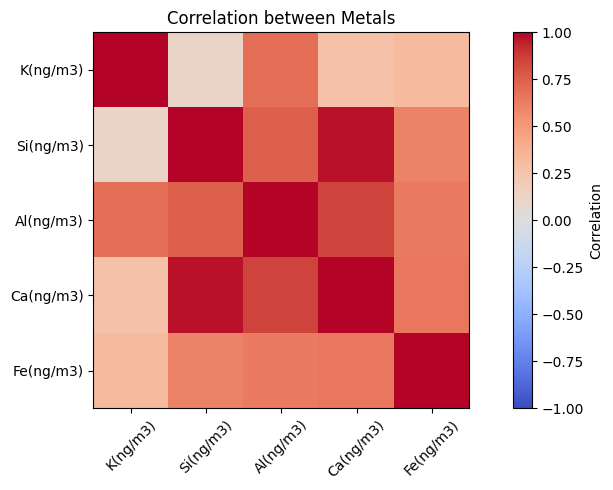

금속 간 상관계수:
           K(ng/m3)  Si(ng/m3)  Al(ng/m3)  Ca(ng/m3)  Fe(ng/m3)
K(ng/m3)   1.000000   0.115948   0.689010   0.271672   0.315912
Si(ng/m3)  0.115948   1.000000   0.747925   0.969966   0.602272
Al(ng/m3)  0.689010   0.747925   1.000000   0.851379   0.637819
Ca(ng/m3)  0.271672   0.969966   0.851379   1.000000   0.656018
Fe(ng/m3)  0.315912   0.602272   0.637819   0.656018   1.000000


In [38]:
# 히트맵
plt.figure(figsize=(9,5))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(target_metals)), target_metals, rotation=45)
plt.yticks(range(len(target_metals)), target_metals)
plt.title('Correlation between Metals')
plt,plt.tight_layout()
plt.show()

# 결과 출력
print("특정 금속 간 상관계수:")
print(corr_matrix)